## Linear Regression Example

In [107]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# 参数
learning_rate = 0.05
training_epochs = 1000
display_step = 50

In [109]:
# 训练数据
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [110]:
# tf输入图形
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [111]:
# 设置模型权重和偏置项
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [112]:
pred = tf.add(tf.multiply(X, W), b)

In [113]:
# 均方误差，误差的和 reduce_sum 
cost = tf.reduce_sum(tf.pow(Y - pred, 2)) / (2 * n_samples)

# 梯度下降优化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [114]:
# 初始化变量（比如赋予初始值)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.079091191 W= 0.25713244 b= 0.7000666
Epoch: 0100 cost= 0.078704990 W= 0.2531719 b= 0.7297352
Epoch: 0150 cost= 0.078493416 W= 0.25028512 b= 0.7513599
Epoch: 0200 cost= 0.078376345 W= 0.248181 b= 0.76712173
Epoch: 0250 cost= 0.078310728 W= 0.24664724 b= 0.7786112
Epoch: 0300 cost= 0.078273408 W= 0.24552932 b= 0.7869855
Epoch: 0350 cost= 0.078251764 W= 0.24471459 b= 0.79308873
Epoch: 0400 cost= 0.078238979 W= 0.2441207 b= 0.79753727
Epoch: 0450 cost= 0.078231193 W= 0.24368769 b= 0.8007812
Epoch: 0500 cost= 0.078226358 W= 0.24337214 b= 0.80314493
Epoch: 0550 cost= 0.078223296 W= 0.24314214 b= 0.8048677
Epoch: 0600 cost= 0.078221284 W= 0.24297446 b= 0.8061238
Epoch: 0650 cost= 0.078219958 W= 0.24285226 b= 0.8070391
Epoch: 0700 cost= 0.078219041 W= 0.24276312 b= 0.8077071
Epoch: 0750 cost= 0.078218423 W= 0.24269834 b= 0.808192
Epoch: 0800 cost= 0.078217983 W= 0.242651 b= 0.8085468
Epoch: 0850 cost= 0.078217693 W= 0.24261664 b= 0.8088042
Epoch: 0900 cost= 0.078217469 W= 0

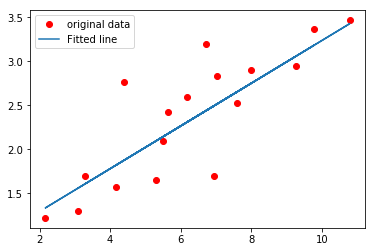

In [115]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x , Y: y})
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", "%04d" % (epoch + 1), "cost=", "{:.9f}".format(c), "W=", 
                      sess.run(W), "b=", sess.run(b))
    print("Optimization finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
    print("Training cost =", training_cost, "W=", sess.run(W), "b=", 
          sess.run(b), "\n") 
        #可视化
    plt.plot(train_X, train_Y, 'ro', label='original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()

## 逻辑回归  使用mnist数据

In [116]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data',one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [125]:
# 参数
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [126]:
# 输入数据
x = tf.placeholder(tf.float32, [None, 784]) #表示输入未知个784维特征的实例
y = tf.placeholder(tf.float32, [None, 10])

# 设置模型权重和偏置
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros(10))
pred = tf.nn.softmax(tf.matmul(x, W) + b)

In [130]:
# 使用交叉熵来最小化误差
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [131]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
#         print(epoch)
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        # 针对每一个batch进行训练
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x:batch_xs,y:batch_ys})
            avg_cost += c / total_batch
        if (epoch + 1) % display_step == 0:
            print("Epoch:", "%04d" % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished")
    
    # 进行测试评估
#     correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    

Epoch: 0001 cost= 1.184924051
Epoch: 0002 cost= 0.665612770
Epoch: 0003 cost= 0.552272355
Epoch: 0004 cost= 0.497143949
Epoch: 0005 cost= 0.467378118
Epoch: 0006 cost= 0.442075595
Epoch: 0007 cost= 0.423985020
Epoch: 0008 cost= 0.414586722
Epoch: 0009 cost= 0.402078590
Epoch: 0010 cost= 0.391169822
Epoch: 0011 cost= 0.384005799
Epoch: 0012 cost= 0.378743592
Epoch: 0013 cost= 0.373016920
Epoch: 0014 cost= 0.366976126
Epoch: 0015 cost= 0.361255935
Epoch: 0016 cost= 0.359017130
Epoch: 0017 cost= 0.353200810
Epoch: 0018 cost= 0.353832146
Epoch: 0019 cost= 0.347953985
Epoch: 0020 cost= 0.344926256
Epoch: 0021 cost= 0.343102220
Epoch: 0022 cost= 0.339515942
Epoch: 0023 cost= 0.338363360
Epoch: 0024 cost= 0.334600941
Epoch: 0025 cost= 0.337002071
Optimization Finished
